In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml

import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import f1_score
import scipy.cluster.hierarchy as shc
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score

Matplotlib created a temporary config/cache directory at /var/folders/th/4wk9mg4j3674pkjtsrtmfmzh0000gn/T/matplotlib-ejcyprd9 because the default path (/Users/shikharanand/.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
iris = fetch_openml(name='iris')

/Users/shikharanand/Anaconda3/anaconda3/lib/python3.8/site-packages/sklearn/datasets/_openml.py:373: UserWarning: Multiple active versions of the dataset matching the name iris exist. Versions may be fundamentally different, returning version 1.
  warn("Multiple active versions of the dataset matching the name"


In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
iris.data.shape

(150, 4)

In [5]:
iris.target.shape

(150,)

In [6]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [7]:
iris.feature_names

['sepallength', 'sepalwidth', 'petallength', 'petalwidth']

In [8]:
iris.target

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [9]:
iris.target_names

['class']

In [10]:
X_df = pd.DataFrame(data=iris.data,    # values
                    index=np.array(range(1,151)),    # 1st column as index
                    columns=np.array(range(1,5)))  # 1st row as the column names

In [11]:
X_df

,1,2,3,4
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
...,...,...,...,...
146,6.7,3.0,5.2,2.3
147,6.3,2.5,5.0,1.9
148,6.5,3.0,5.2,2.0
149,6.2,3.4,5.4,2.3


In [12]:
y_df = pd.DataFrame(data=iris.target,    # values
                    index=np.array(range(1,151)),    # 1st column as index
                    columns=np.array(range(1,2)))  # 1st row as the column names

In [13]:
np.unique(iris.target)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [14]:
y_df = y_df.replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], [0, 1, 2])

In [15]:
y_df

,1
1,0
2,0
3,0
4,0
5,0
...,...
146,2
147,2
148,2
149,2


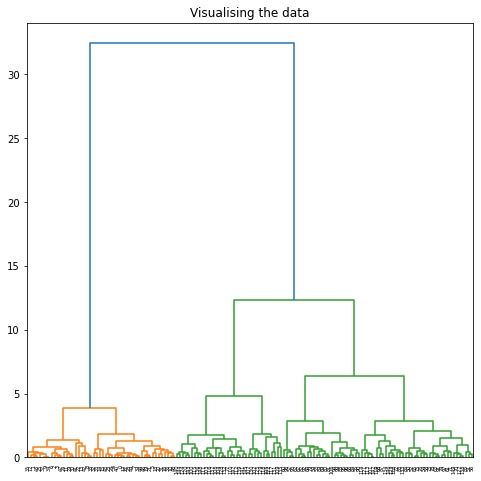

In [16]:
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X_df, method ='ward')))

### The x-axis contains the samples and y-axis represents the distance between these samples. The vertical line with maximum distance is the blue line and hence we can decide a threshold of 15 and cut the dendrogram:

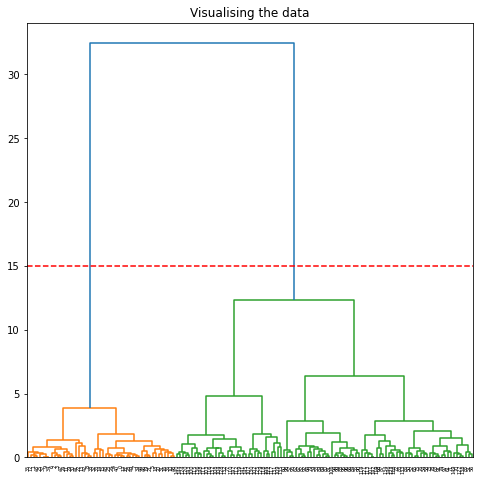

In [17]:
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X_df, method ='ward')))
plt.axhline(y=15, color='r', linestyle='--')

### for clusters = 2

In [18]:
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
model.fit(X_df)
labels = model.labels_
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


### Visualizing the clustering

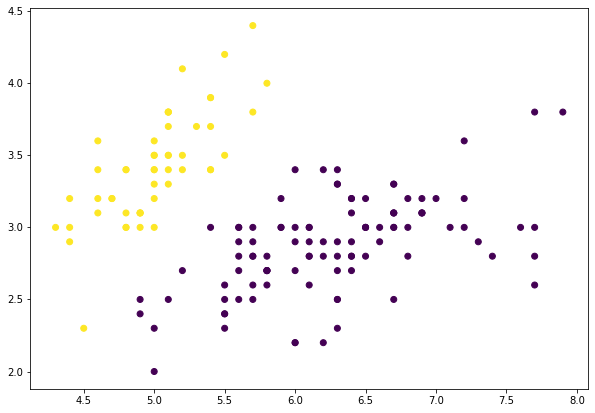

In [19]:
plt.figure(figsize=(10, 7))  
plt.scatter(X_df[1], X_df[2], c=model.labels_)

In [20]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    model = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
    model.fit(X_df)
    score = silhouette_score(X_df, model.labels_)
    silhouette_coefficients.append(score)

In [21]:
silhouette_coefficients

[0.6863930543445408,
 0.5540972908150553,
 0.4887398491004218,
 0.4841553526240121,
 0.3618845152256815,
 0.34485408962742314,
 0.346240531220859,
 0.3331385065963713,
 0.3291603116392887]

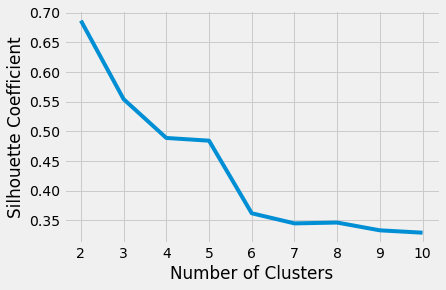

In [22]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [23]:
model.labels_

array([0, 5, 5, 5, 0, 0, 5, 0, 5, 5, 0, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0,
       5, 0, 5, 5, 0, 0, 0, 5, 5, 0, 0, 0, 5, 5, 0, 5, 5, 0, 0, 5, 5, 0,
       0, 5, 0, 5, 0, 0, 8, 3, 8, 9, 8, 6, 3, 7, 8, 9, 7, 3, 9, 3, 9, 8,
       6, 9, 2, 9, 3, 3, 2, 3, 3, 8, 8, 4, 3, 9, 9, 9, 9, 2, 6, 3, 8, 2,
       6, 9, 6, 3, 9, 7, 6, 6, 6, 3, 7, 6, 4, 2, 1, 4, 4, 1, 6, 1, 4, 1,
       4, 4, 4, 2, 2, 4, 4, 1, 1, 2, 4, 2, 1, 2, 4, 1, 2, 3, 4, 1, 1, 1,
       4, 2, 2, 1, 4, 4, 3, 4, 4, 4, 2, 4, 4, 4, 2, 4, 4, 3])

In [25]:
new_labels = pd.DataFrame(data=model.labels_,    # values
                    index=np.array(range(1,151)),    # 1st column as index
                    columns=np.array(range(1,2)))  # 1st row as the column names

In [26]:
f1s = f1_score(y_df, new_labels, average='weighted')
print(f1s*100)

35.21367521367521


In [27]:
arc = adjusted_rand_score(y_df.iloc[:,0], model.labels_)
print(arc*100)

37.093951131669655
